In [3]:
# 기본적인 패키지부터 추가
import numpy as np
import pandas as pd
import scipy as super

import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# 한글 설정/차트 마이너스 깨짐현상 해결 / seaborn 화면설정
from matplotlib import rc
import matplotlib.font_manager as fm

plt.rc('font', family='Malgun Gothic')
sns.set(font='Malgun Gothic', rc={'axes.unicode_minus':False}, style='darkgrid')

In [3]:
# 머신러닝 패키지 import
import statsmodels.api as sm #안쓸듯
import sklearn as sk

#### 데이터준비

다중분류 (7가지 생선 중에서 무얼까?)

In [4]:
fish = pd.read_csv("https://bit.ly/fish_csv")A
fish.tail()

,Species,Weight,Length,Diagonal,Height,Width
154,Smelt,12.2,12.2,13.4,2.0904,1.3936
155,Smelt,13.4,12.4,13.5,2.4300,1.2690
156,Smelt,12.2,13.0,13.8,2.2770,1.2558
157,Smelt,19.7,14.3,15.2,2.8728,2.0672
158,Smelt,19.9,15.0,16.2,2.9322,1.8792


In [5]:
fish.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 159 entries, 0 to 158
Data columns (total 6 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Species   159 non-null    object 
 1   Weight    159 non-null    float64
 2   Length    159 non-null    float64
 3   Diagonal  159 non-null    float64
 4   Height    159 non-null    float64
 5   Width     159 non-null    float64
dtypes: float64(5), object(1)
memory usage: 7.6+ KB


In [6]:
pd.unique(fish.Species)

array(['Bream', 'Roach', 'Whitefish', 'Parkki', 'Perch', 'Pike', 'Smelt'],
      dtype=object)

In [12]:
fish_input = fish[["Weight","Length", "Diagonal", "Height", "Width"]].to_numpy()

In [8]:
fish_input.shape

(159, 6)

In [15]:
fish_input[:5]

array([[242.    ,  25.4   ,  30.    ,  11.52  ,   4.02  ],
       [290.    ,  26.3   ,  31.2   ,  12.48  ,   4.3056],
       [340.    ,  26.5   ,  31.1   ,  12.3778,   4.6961],
       [363.    ,  29.    ,  33.5   ,  12.73  ,   4.4555],
       [430.    ,  29.    ,  34.    ,  12.444 ,   5.134 ]])

In [18]:
fish_target = fish["Species"].to_numpy()
fish_target[154:]

array(['Smelt', 'Smelt', 'Smelt', 'Smelt', 'Smelt'], dtype=object)

In [19]:
from sklearn.model_selection import train_test_split

train_input, test_input, train_target, test_target = train_test_split(fish_input,fish_target,random_state=42)
# random_state를 변경하면서 훈련

In [21]:
print(train_input.shape)
print(test_input.shape)

(119, 5)
(40, 5)


### 단위값을 표준화

In [24]:
from sklearn.preprocessing import StandardScaler

ss = StandardScaler()
ss.fit(train_input)

StandardScaler()

In [25]:
train_scaled = ss.transform(train_input)
test_scaled = ss.transform(test_input)

In [26]:
train_scaled[:20]

array([[ 0.91965782,  0.60943175,  0.81041221,  1.85194896,  1.00075672],
       [ 0.30041219,  1.54653445,  1.45316551, -0.46981663,  0.27291745],
       [-1.0858536 , -1.68646987, -1.70848587, -1.70159849, -2.0044758 ],
       [-0.79734143, -0.60880176, -0.67486907, -0.82480589, -0.27631471],
       [-0.71289885, -0.73062511, -0.70092664, -0.0802298 , -0.7033869 ],
       [-0.9127463 , -0.96490079, -0.95281644, -0.88017186, -0.99153566],
       [-0.79734143, -0.70251203, -0.76172762, -0.78282455, -0.54453018],
       [ 0.63818253,  0.56257661,  0.73223951,  1.64473401,  0.50705737],
       [-0.74104638, -0.67439895, -0.73567006, -0.61205928, -0.55733138],
       [-0.86771025, -0.7962223 , -0.89201546, -0.93358694, -1.02183182],
       [ 0.82114147,  0.74999715,  0.67143852,  0.4984706 ,  1.47257213],
       [ 0.30041219,  0.23459067,  0.42823457,  1.36042157,  0.22329758],
       [ 0.33981873,  0.40326915,  0.23714575,  0.28831696,  0.95686692],
       [-0.54401367, -0.51509149, -0.4

#### k-최근접 이웃 분류 알고리즘 분류

In [39]:
from sklearn.neighbors import KNeighborsClassifier

kn = KNeighborsClassifier(n_neighbors=5)
kn.fit(X=train_scaled, y=train_target)

KNeighborsClassifier()

In [40]:
print(kn.score(X=train_scaled, y=train_target))
print(kn.score(X=test_scaled, y=test_target))

0.7983193277310925
0.85


In [41]:
kn.classes_

array(['Bream', 'Parkki', 'Perch', 'Pike', 'Roach', 'Smelt', 'Whitefish'],
      dtype=object)

#### KNN 분류로 예측

In [42]:
test_scaled[:5]
#표준화된거라 뭔지 잘모름

array([[-0.88741352, -0.91804565, -1.03098914, -0.90464451, -0.80762518],
       [-1.06924656, -1.50842035, -1.54345461, -1.58849582, -1.93803151],
       [-0.54401367,  0.35641402,  0.30663259, -0.8135697 , -0.65388895],
       [-0.34698097, -0.23396068, -0.22320459, -0.11905019, -0.12233464],
       [-0.68475132, -0.51509149, -0.58801052, -0.8998784 , -0.50124996]])

In [43]:
print(test_input[:5])

print(test_target[:5])

print(kn.predict(test_scaled[:5]))
#예측(80~85%정도 맞는듯)

[[ 78.      18.7     19.4      5.1992   3.1234]
 [ 13.4     12.4     13.5      2.43     1.269 ]
 [200.      32.3     34.8      5.568    3.3756]
 [270.      26.      28.7      8.3804   4.2476]
 [150.      23.      24.5      5.2185   3.626 ]]
['Perch' 'Smelt' 'Pike' 'Whitefish' 'Perch']
['Perch' 'Smelt' 'Pike' 'Perch' 'Perch']


In [44]:
print(kn.classes_)
proba = kn.predict_proba(test_scaled[:5])
print(np.round(proba, decimals=4)) #decimals=4 : 소수점4째자리까지 출력
# 1이면 100%확률

['Bream' 'Parkki' 'Perch' 'Pike' 'Roach' 'Smelt' 'Whitefish']
[[0.  0.  0.6 0.  0.4 0.  0. ]
 [0.  0.  0.  0.  0.  1.  0. ]
 [0.  0.  0.2 0.8 0.  0.  0. ]
 [0.  0.  0.8 0.  0.2 0.  0. ]
 [0.  0.  0.8 0.  0.2 0.  0. ]]


#### 로지스틱 회귀

In [45]:
z = np.arange(-5, 5, 0.1)
z

array([-5.00000000e+00, -4.90000000e+00, -4.80000000e+00, -4.70000000e+00,
       -4.60000000e+00, -4.50000000e+00, -4.40000000e+00, -4.30000000e+00,
       -4.20000000e+00, -4.10000000e+00, -4.00000000e+00, -3.90000000e+00,
       -3.80000000e+00, -3.70000000e+00, -3.60000000e+00, -3.50000000e+00,
       -3.40000000e+00, -3.30000000e+00, -3.20000000e+00, -3.10000000e+00,
       -3.00000000e+00, -2.90000000e+00, -2.80000000e+00, -2.70000000e+00,
       -2.60000000e+00, -2.50000000e+00, -2.40000000e+00, -2.30000000e+00,
       -2.20000000e+00, -2.10000000e+00, -2.00000000e+00, -1.90000000e+00,
       -1.80000000e+00, -1.70000000e+00, -1.60000000e+00, -1.50000000e+00,
       -1.40000000e+00, -1.30000000e+00, -1.20000000e+00, -1.10000000e+00,
       -1.00000000e+00, -9.00000000e-01, -8.00000000e-01, -7.00000000e-01,
       -6.00000000e-01, -5.00000000e-01, -4.00000000e-01, -3.00000000e-01,
       -2.00000000e-01, -1.00000000e-01, -1.77635684e-14,  1.00000000e-01,
        2.00000000e-01,  

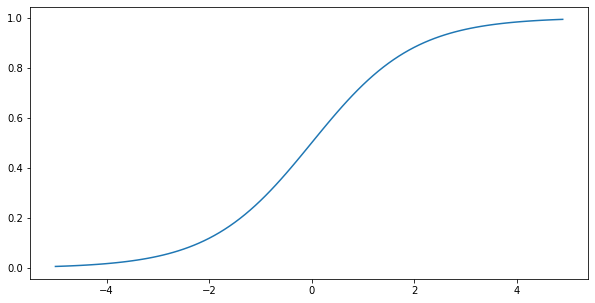

In [46]:
phi = 1 / (1 + np.exp(-z)) # 시그모이드(로지스틱) 함수 : 무조건 0에서 1사이 값임

plt.figure(figsize=(10,5))
plt.plot(z,phi)
plt.show()

#### 로지스틱 이진분류

In [47]:
bream_smelt_indexes = (train_target == "Bream") | (train_target == "Smelt")

In [50]:
bream_smelt_indexes
#bream하고 smelt만 True

array([ True, False,  True, False, False, False, False,  True, False,
       False, False,  True, False, False, False,  True,  True, False,
       False,  True, False,  True, False, False, False,  True, False,
       False,  True, False, False, False, False,  True, False, False,
        True,  True, False, False, False, False, False,  True, False,
       False, False, False, False,  True, False,  True, False, False,
        True, False, False, False,  True, False, False, False, False,
       False, False,  True, False,  True, False, False, False, False,
       False, False, False, False, False,  True, False,  True, False,
       False,  True,  True, False, False, False,  True, False, False,
       False, False, False,  True, False, False, False,  True, False,
        True, False, False,  True,  True, False, False, False, False,
       False, False, False, False,  True,  True, False, False,  True,
       False, False])

In [55]:
bream_smelt_indexes.shape

(119,)

In [52]:
train_bream_smelt = train_scaled[bream_smelt_indexes]
target_bream_smelt = train_target[bream_smelt_indexes]

In [53]:
train_bream_smelt

array([[ 0.91965782,  0.60943175,  0.81041221,  1.85194896,  1.00075672],
       [-1.0858536 , -1.68646987, -1.70848587, -1.70159849, -2.0044758 ],
       [ 0.63818253,  0.56257661,  0.73223951,  1.64473401,  0.50705737],
       [ 0.30041219,  0.23459067,  0.42823457,  1.36042157,  0.22329758],
       [ 0.9027693 ,  0.70314202,  0.88858491,  1.89027545,  0.85537174],
       [-1.0824759 , -1.61150165, -1.62162731, -1.7000674 , -1.92815631],
       [ 0.10337949,  0.04717013,  0.23714575,  0.88445197,  0.41799764],
       [ 1.49668216,  1.03112796,  1.21864741,  2.44274986,  1.40289707],
       [ 0.23004337,  0.23459067,  0.42823457,  1.3336029 ,  0.39983213],
       [-0.42579405, -0.29018684, -0.11028847,  0.65627104, -0.26107519],
       [ 1.28557569,  0.70314202,  0.89727076,  1.98228866,  1.06683526],
       [ 0.93373158,  0.60943175,  0.83646978,  1.85150445,  0.97832415],
       [ 0.80706771,  0.60943175,  0.81041221,  1.63137406,  1.0255057 ],
       [-1.07262426, -1.52716241, -1.5

In [54]:
target_bream_smelt
#bream하고 smelt만 존재

array(['Bream', 'Smelt', 'Bream', 'Bream', 'Bream', 'Smelt', 'Bream',
       'Bream', 'Bream', 'Bream', 'Bream', 'Bream', 'Bream', 'Smelt',
       'Bream', 'Smelt', 'Smelt', 'Bream', 'Bream', 'Bream', 'Bream',
       'Bream', 'Bream', 'Bream', 'Bream', 'Smelt', 'Bream', 'Smelt',
       'Smelt', 'Bream', 'Smelt', 'Bream', 'Bream'], dtype=object)

In [56]:
from sklearn.linear_model import LogisticRegression # 로지스틱 회귀(분류)

lr = LogisticRegression()
lr.fit(X=train_bream_smelt, y=target_bream_smelt)

LogisticRegression()

In [58]:
lr.score(X=train_bream_smelt, y=target_bream_smelt)

1.0

In [61]:
print(target_bream_smelt[:5])
print(lr.predict(X=train_bream_smelt[:5]))

['Bream' 'Smelt' 'Bream' 'Bream' 'Bream']
['Bream' 'Smelt' 'Bream' 'Bream' 'Bream']


In [62]:
lr.predict_proba(X=train_bream_smelt[:5])
# [bream일 확률, smelt일 확률]

array([[0.99759855, 0.00240145],
       [0.02735183, 0.97264817],
       [0.99486072, 0.00513928],
       [0.98584202, 0.01415798],
       [0.99767269, 0.00232731]])

In [63]:
lr.classes_

array(['Bream', 'Smelt'], dtype=object)

In [64]:
print(lr.coef_, lr.intercept_)

[[-0.4037798  -0.57620209 -0.66280298 -1.01290277 -0.73168947]] [-2.16155132]


In [67]:
z = -0.4037798 * train_bream_smelt[0][0] + -0.57620209 * train_bream_smelt[0][1] + -0.66280298 * train_bream_smelt[0][2] + -1.01290277 * train_bream_smelt[0][3] + -0.73168947 * train_bream_smelt[0][4] + -2.16155132
z

-6.029277426945976